
# Census Income Data Set

Problem Statment: The data set Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sb
import os

In [191]:
os.chdir("C:\\Users\\kumarvch\\OneDrive - HP Inc\\census_income_casestudy")

In [263]:
#Importing Train and test data
data = pd.read_csv("adult.csv")# <- Trian
test = pd.read_csv("adult_test.csv")#<- Test

# Data preprocessing

In [201]:
data.head()

,age,workclass,fnlwgt,education,education_status,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [264]:
test.head()

,age,workclass,fnlwgt,education,education_status,marital-status,occupation,relationship,race,sex,capital-gain,capital-los,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [266]:
data.shape, test.shape

((32561, 15), (16281, 15))

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_status  32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-los       32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  native-country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [267]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               16281 non-null  int64 
 1   workclass         16281 non-null  object
 2   fnlwgt            16281 non-null  int64 
 3   education         16281 non-null  object
 4   education_status  16281 non-null  int64 
 5   marital-status    16281 non-null  object
 6   occupation        16281 non-null  object
 7   relationship      16281 non-null  object
 8   race              16281 non-null  object
 9   sex               16281 non-null  object
 10  capital-gain      16281 non-null  int64 
 11  capital-los       16281 non-null  int64 
 12  hours-per-week    16281 non-null  int64 
 13  native-country    16281 non-null  object
 14  Income            16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


####  we can see that there are total of 32561 results and there are no null values in the data

### Missing Value check

In [268]:
missing = [features for features in data.columns if data[features].isnull().sum() >0]
missing_test = [features for features in test.columns if test[features].isnull().sum() >0]

In [269]:
missing
missing_test

[]

In [270]:
data.describe()

,age,fnlwgt,education_status,capital-gain,capital-los,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581770,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640382,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [272]:
test.describe()

,age,fnlwgt,education_status,capital-gain,capital-los,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [273]:
categorical_columns = [features for features in data.columns if data[features].dtype == 'O']
categorical_columns_test = [features for features in test.columns if test[features].dtype == 'O']

,number of unique
features,
native-country,42
education,16
occupation,15
workclass,9
marital-status,7
relationship,6
race,5
sex,2
Income,2


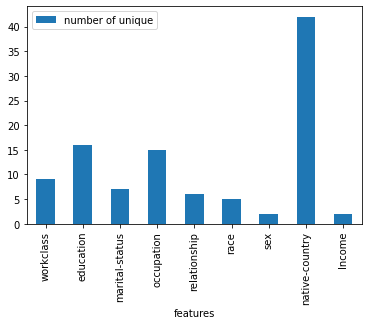

In [207]:
rows = [[i , len(categorical_data[i].unique())] for i in categorical_columns] 
cat_unique = pd.DataFrame(rows, columns=['features' , 'number of unique'])
cat_unique.set_index('features',inplace=True)
cat_unique.sort_values('number of unique' ,ascending=False)
cat_unique.plot(kind = 'bar', sort_columns = False)
cat_unique.sort_values('number of unique' , ascending=False)

In [208]:
categorical_uniques = pd.DataFrame()
for i in categorical_columns:
    categorical_uniques = pd.concat([categorical_uniques , 
                                    pd.DataFrame(data[i].unique() , columns=[i])],ignore_index=False , axis = 1)
    
categorical_uniques

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,Black,Female,Cuba,>50K
2,Private,11th,Divorced,Handlers-cleaners,Wife,Asian-Pac-Islander,NaN,Jamaica,NaN
3,Federal-gov,Masters,Married-spouse-absent,Prof-specialty,Own-child,Amer-Indian-Eskimo,NaN,India,NaN
4,Local-gov,9th,Separated,Other-service,Unmarried,Other,NaN,?,NaN
5,?,Some-college,Married-AF-spouse,Sales,Other-relative,NaN,NaN,Mexico,NaN
6,Self-emp-inc,Assoc-acdm,Widowed,Craft-repair,NaN,NaN,NaN,South,NaN
7,Without-pay,Assoc-voc,NaN,Transport-moving,NaN,NaN,NaN,Puerto-Rico,NaN
8,Never-worked,7th-8th,NaN,Farming-fishing,NaN,NaN,NaN,Honduras,NaN
9,NaN,Doctorate,NaN,Machine-op-inspct,NaN,NaN,NaN,England,NaN


In [274]:
categorical_uniques_test = pd.DataFrame()
for i in categorical_columns_test:
    categorical_uniques_test = pd.concat([categorical_uniques_test , 
                                    pd.DataFrame(test[i].unique() , columns=[i])],ignore_index=False , axis = 1)
    
categorical_uniques_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K.
1,Local-gov,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Female,?,>50K.
2,?,Assoc-acdm,Widowed,Protective-serv,Not-in-family,Asian-Pac-Islander,NaN,Peru,NaN
3,Self-emp-not-inc,Some-college,Divorced,?,Unmarried,Other,NaN,Guatemala,NaN
4,Federal-gov,10th,Separated,Other-service,Wife,Amer-Indian-Eskimo,NaN,Mexico,NaN
5,State-gov,Prof-school,Married-spouse-absent,Prof-specialty,Other-relative,NaN,NaN,Dominican-Republic,NaN
6,Self-emp-inc,7th-8th,Married-AF-spouse,Craft-repair,NaN,NaN,NaN,Ireland,NaN
7,Without-pay,Bachelors,NaN,Adm-clerical,NaN,NaN,NaN,Germany,NaN
8,Never-worked,Masters,NaN,Exec-managerial,NaN,NaN,NaN,Philippines,NaN
9,NaN,Doctorate,NaN,Tech-support,NaN,NaN,NaN,Thailand,NaN


#### we see that ? is there in  workclass ,occupation and native-country coulumns

#### we need to get the percentage of ? values in the data

In [209]:
[[i,data[data[i]== " ?"].shape[0]/len(data)]for i in data.columns]

[['age', 0.0],
 ['workclass', 0.05638647461687295],
 ['fnlwgt', 0.0],
 ['education', 0.0],
 ['education_status', 0.0],
 ['marital-status', 0.0],
 ['occupation', 0.056601455729246644],
 ['relationship', 0.0],
 ['race', 0.0],
 ['sex', 0.0],
 ['capital-gain', 0.0],
 ['capital-los', 0.0],
 ['hours-per-week', 0.0],
 ['native-country', 0.0179048555019809],
 ['Income', 0.0]]

In [275]:
[[i,test[test[i]== " ?"].shape[0]/len(test)]for i in test.columns]

[['age', 0.0],
 ['workclass', 0.05914870093974572],
 ['fnlwgt', 0.0],
 ['education', 0.0],
 ['education_status', 0.0],
 ['marital-status', 0.0],
 ['occupation', 0.05933296480560162],
 ['relationship', 0.0],
 ['race', 0.0],
 ['sex', 0.0],
 ['capital-gain', 0.0],
 ['capital-los', 0.0],
 ['hours-per-week', 0.0],
 ['native-country', 0.01682943308150605],
 ['Income', 0.0]]

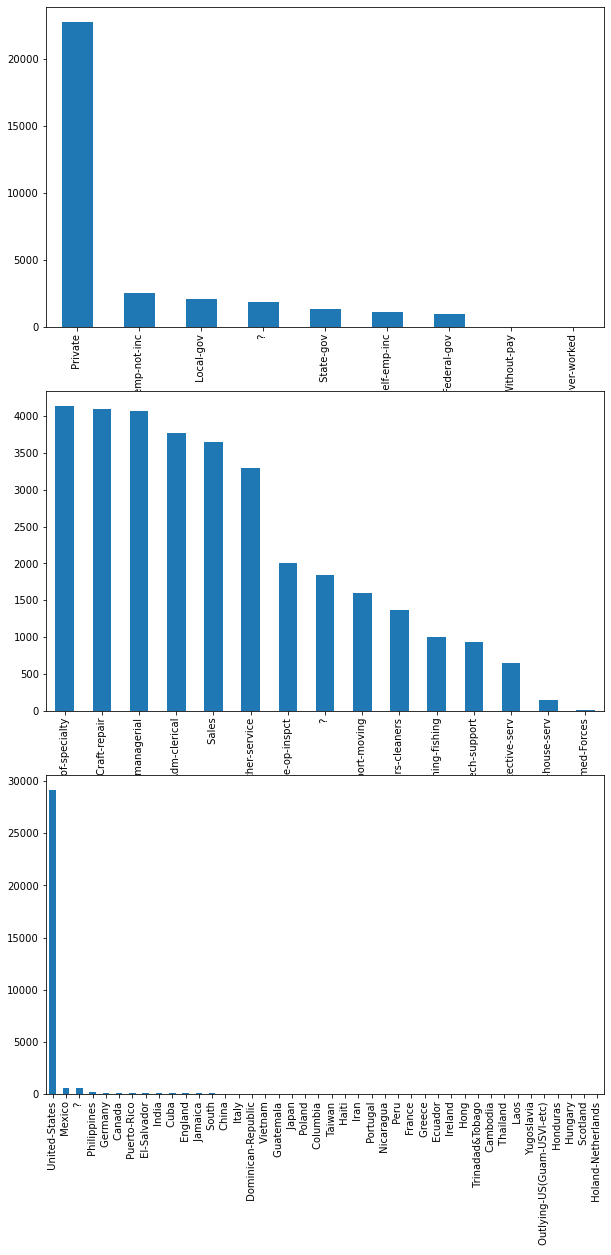

In [212]:
mlp.figure(figsize=(10,20))
for i in enumerate(['workclass' , 'occupation' , 'native-country']):
    mlp.subplot(3,1,i[0]+1)
    data[i[1]].value_counts().plot(kind= 'bar',)

mlp.show()
    

In [221]:
data['workclass'].value_counts(normalize=True)

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64

In [218]:
data.groupby(['workclass']).Income.value_counts(normalize = True).unstack()

Income,<=50K,>50K
workclass,,
?,0.895969,0.104031
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Never-worked,1.000000,NaN
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.715073,0.284927
State-gov,0.728043,0.271957
Without-pay,1.000000,NaN


In [219]:
data.groupby(['workclass']).age.mean()

workclass
 ?                   40.960240
 Federal-gov         42.590625
 Local-gov           41.751075
 Never-worked        20.571429
 Private             36.797762
 Self-emp-inc        46.017025
 Self-emp-not-inc    44.969697
 State-gov           39.436055
 Without-pay         47.785714
Name: age, dtype: float64

####  "?" class have same age group and percent of records as local- gov class so I have decided to replace "?" with local government

In [276]:
data["workclass"]=data["workclass"].replace(" ?","Local-gov")
test["workclass"]=test["workclass"].replace(" ?","Local-gov")

In [277]:
data['occupation'].value_counts(normalize=True)

 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
 ?                    0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: occupation, dtype: float64

In [278]:
by_workclass=data.groupby(['occupation']).Income.value_counts(normalize = True)
by_workclass.unstack()

Income,<=50K,>50K
occupation,,
?,0.896365,0.103635
Adm-clerical,0.865517,0.134483
Armed-Forces,0.888889,0.111111
Craft-repair,0.773359,0.226641
Exec-managerial,0.515986,0.484014
Farming-fishing,0.884306,0.115694
Handlers-cleaners,0.937226,0.062774
Machine-op-inspct,0.875125,0.124875
Other-service,0.958422,0.041578


In [279]:
data.groupby(['occupation']).age.mean()

occupation
 ?                    40.882800
 Adm-clerical         36.964456
 Armed-Forces         30.222222
 Craft-repair         39.031471
 Exec-managerial      42.169208
 Farming-fishing      41.211268
 Handlers-cleaners    32.165693
 Machine-op-inspct    37.715285
 Other-service        34.949621
 Priv-house-serv      41.724832
 Prof-specialty       40.518599
 Protective-serv      38.953775
 Sales                37.353973
 Tech-support         37.022629
 Transport-moving     40.197871
Name: age, dtype: float64

#### "?" class have same age group and percent of records as Transport-moving class so I have decided to replace "?" with Transport-moving

In [280]:
data["occupation"]=data["occupation"].replace(" ?","Transport-moving")
test["occupation"]=test["occupation"].replace(" ?","Transport-moving")

In [281]:
data['native-country'].value_counts(normalize=True)

 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [282]:
data.groupby(['native-country']).age.mean()

native-country
 ?                             38.725557
 Cambodia                      37.789474
 Canada                        42.545455
 China                         42.533333
 Columbia                      39.711864
 Cuba                          45.768421
 Dominican-Republic            37.728571
 Ecuador                       36.642857
 El-Salvador                   34.132075
 England                       41.155556
 France                        38.965517
 Germany                       39.255474
 Greece                        46.206897
 Guatemala                     32.421875
 Haiti                         38.272727
 Holand-Netherlands            32.000000
 Honduras                      33.846154
 Hong                          33.650000
 Hungary                       49.384615
 India                         38.090000
 Iran                          39.418605
 Ireland                       36.458333
 Italy                         46.424658
 Jamaica                       35.592593
 

#### replacing the "?" values with mode

In [283]:
data["native-country"]=data["native-country"].replace(" ?",data["native-country"].mode()[0])
test["native-country"]=test["native-country"].replace(" ?",test["native-country"].mode()[0])

In [284]:
[[i,data[data[i]== " ?"].shape[0]/len(data)]for i in data.columns]

[['age', 0.0],
 ['workclass', 0.0],
 ['fnlwgt', 0.0],
 ['education', 0.0],
 ['education_status', 0.0],
 ['marital-status', 0.0],
 ['occupation', 0.0],
 ['relationship', 0.0],
 ['race', 0.0],
 ['sex', 0.0],
 ['capital-gain', 0.0],
 ['capital-los', 0.0],
 ['hours-per-week', 0.0],
 ['native-country', 0.0],
 ['Income', 0.0]]

In [285]:
[[i,test[test[i]== " ?"].shape[0]/len(test)]for i in test.columns]

[['age', 0.0],
 ['workclass', 0.0],
 ['fnlwgt', 0.0],
 ['education', 0.0],
 ['education_status', 0.0],
 ['marital-status', 0.0],
 ['occupation', 0.0],
 ['relationship', 0.0],
 ['race', 0.0],
 ['sex', 0.0],
 ['capital-gain', 0.0],
 ['capital-los', 0.0],
 ['hours-per-week', 0.0],
 ['native-country', 0.0],
 ['Income', 0.0]]

# Outliers analysis

In [286]:
cnames = [feature for feature in data.columns if data[feature].dtypes != 'O']
cnames_test = [feature for feature in test.columns if test[feature].dtypes != 'O']

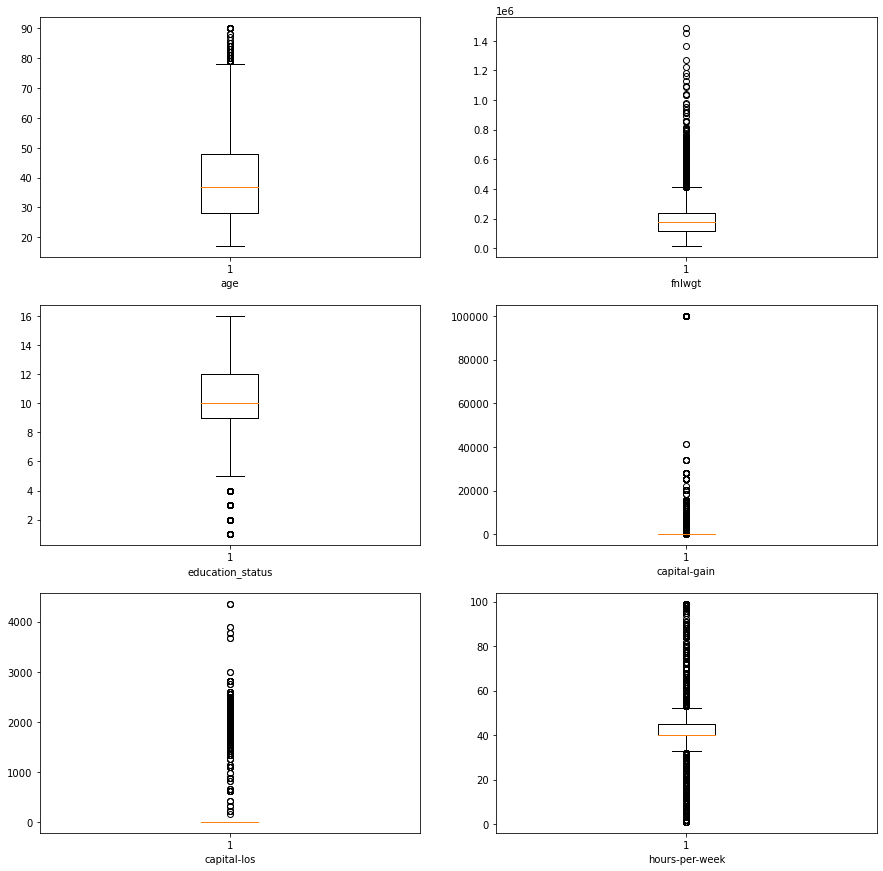

In [287]:
mlp.figure(figsize=(15,15))
for i in enumerate(cnames):
    mlp.subplot(3,2,i[0]+1)
    mlp.boxplot(data[i[1]])
    mlp.xlabel(i[1])
    
mlp.show()

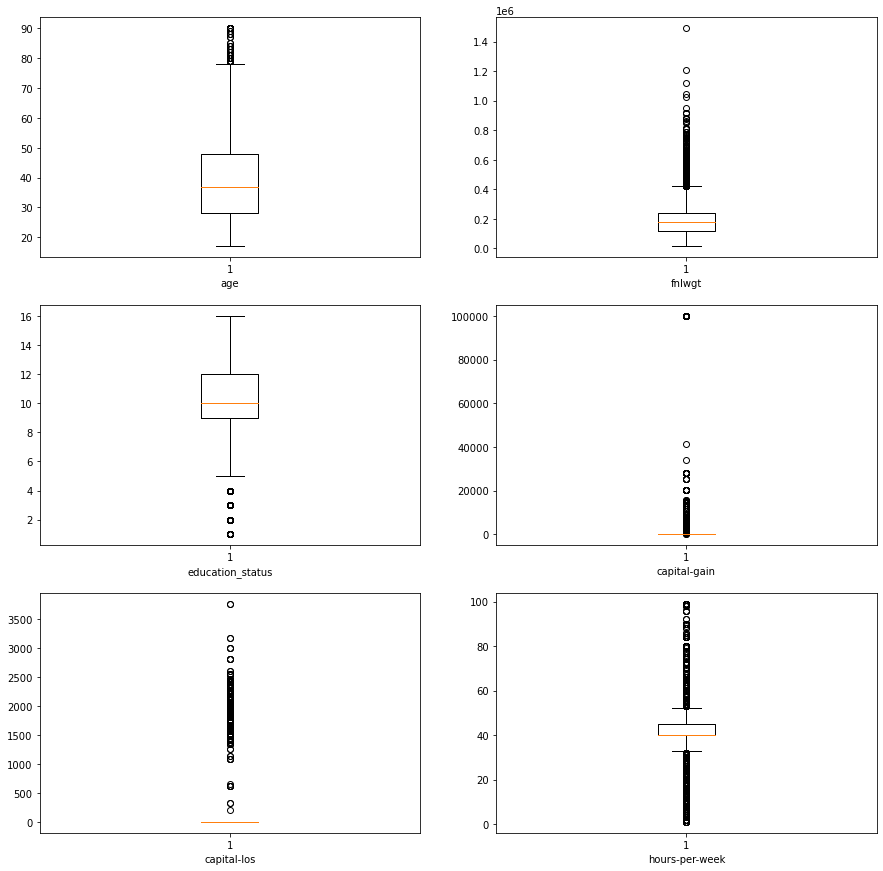

In [288]:
mlp.figure(figsize=(15,15))
for i in enumerate(cnames_test):
    mlp.subplot(3,2,i[0]+1)
    mlp.boxplot(test[i[1]])
    mlp.xlabel(i[1])
    
mlp.show()

In [289]:
df = pd.DataFrame(columns=['feature' , 'Min' , 'Max'])
out_data=[]
colum = list(df)
for variable in cnames:
    q25,q75 = np.percentile(data[variable],[25,75])
    iqr = q75-q25
    
    min_val = q25 - (1.5*iqr)
    max_val = q75 + (1.5*iqr)
    
    value = [variable, min_val , max_val]
    zipped = zip(colum, value)
    a_dictionary = dict(zipped)
    out_data.append(a_dictionary)

df = df.append(out_data, True)

In [290]:
df

,feature,Min,Max
0,age,-2.0,78.0
1,fnlwgt,-61009.0,415887.0
2,education_status,4.5,16.5
3,capital-gain,0.0,0.0
4,capital-los,0.0,0.0
5,hours-per-week,32.5,52.5


In [257]:
data.describe()

,age,fnlwgt,education_status,capital-gain,capital-los,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581770,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640382,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# max age is 90 and as it is valid lets not consider outliers in age
# we will consider Education status as category so outliers not applicable
# capital_gain and capital los is 0 for most of the instance but for some instances there is a valid entry so we consider these variable as it is
# Max work hour is 99 as that can be valid instance we will consider that

In [259]:
data['fnlwgt'].quantile(0.90)

329054.0

In [291]:
test['fnlwgt'].quantile(0.90)

327203.0

In [292]:
data["fnlwgt"] = np.where(data["fnlwgt"] >329054, 329054,data['fnlwgt'])
test["fnlwgt"] = np.where(test["fnlwgt"] >327203, 327203,test['fnlwgt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15b25bf1040>,
 'caps': [<matplotlib.lines.Line2D at 0x15b25fe8730>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b230fc220>],
 'medians': [<matplotlib.lines.Line2D at 0x15b25fe81c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b25c345e0>],
 'means': []}

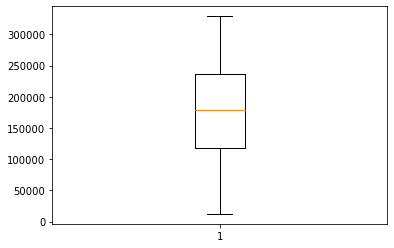

In [293]:
mlp.boxplot(data['fnlwgt'])

In [294]:
data.to_csv("pre_data.csv")
test.to_csv("pre_test.csv")